In [350]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import sklearn.ensemble
%matplotlib inline

In [351]:
loans = pd.read_csv('./data/lending-club-data.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [352]:
loans.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,not_compliant,inactive_loans,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,122578.000000,50500.000000,12531.000000,122578.000000,122578.000000,1.226070e+05,122607.000000,122578.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,122462.000000,15460.000000,122607.0,122607.000000,122607.0,122607.000000,122607.000000,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,0.980861,35.258198,73.964488,10.457749,0.103477,1.483507e+04,53.716307,24.248169,22.028899,22.015354,12510.211529,12269.338465,10707.864970,1696.232305,0.742344,105.371929,4.957537,6156.808616,0.003495,42.428913,1.0,0.021761,1.0,0.188815,6.370256,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,1.263588,21.950074,35.855540,4.713957,0.359382,1.937773e+04,25.723881,11.629814,611.510973,611.116057,9046.331429,9061.593794,8041.776401,1793.448627,5.363268,575.651981,94.427007,7155.007894,0.063674,21.457282,0.0,0.145901,0.0,0.391363,3.736014,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,0.000000,17.000000,52.000000,7.000000,0.000000,5.474000e+03,34.800000,16.000000,0.000000,0.000000,5669.805000,5454.050000,4500.000000,550.555000,0.000000,0.000000,0.000000,440.180000,0.000000,25.000000,1.0,0.000000,1.0,0.000000,3.000000,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,1.000000,33.000000,86.000000,10.000000,0.000000,1.058600e+04,55.700000,23.000000,0.000000,0.000000,10575.400000,10352.500000,9100.000000,1136.920000,0.000000,0.000000,0.000000,3609.580000,0.000000,41.000000,1.0,0.000000,1.0,0.000000,6.000000,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,2.000000,51.000000,103.000000,13.000000,0.000000,1.855200e+04,74.300000,31.000000,0.000000,0.000000,17177.650000,16914.050000,15000.000000,2167.950000,0.000000,0.000000,0.000000,9554.700000,0.000000,60.000000,1.0,0.000000,1.0,0.000000,11.000000,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,3.784128e+07,4.060424e+07,35000.000000,350

In [353]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

In [354]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans',axis=1)

In [355]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]


In [356]:
loans = loans[[target] + features].dropna()

In [357]:
# one hot encoding converts the data aset into machine splittable version so we are not deailing
# with strings
loans_ohe = pd.get_dummies(loans)
loans_ohe.head()
ohe_features= loans_ohe.columns.values
type(ohe_features)
print (ohe_features)

['safe_loans' 'sub_grade_num' 'short_emp' 'emp_length_num' 'dti'
 'payment_inc_ratio' 'delinq_2yrs' 'delinq_2yrs_zero' 'inq_last_6mths'
 'last_delinq_none' 'last_major_derog_none' 'open_acc' 'pub_rec'
 'pub_rec_zero' 'revol_util' 'total_rec_late_fee' 'int_rate'
 'total_rec_int' 'annual_inc' 'funded_amnt' 'funded_amnt_inv' 'installment'
 'grade_A' 'grade_B' 'grade_C' 'grade_D' 'grade_E' 'grade_F' 'grade_G'
 'home_ownership_MORTGAGE' 'home_ownership_OTHER' 'home_ownership_OWN'
 'home_ownership_RENT' 'purpose_car' 'purpose_credit_card'
 'purpose_debt_consolidation' 'purpose_home_improvement' 'purpose_house'
 'purpose_major_purchase' 'purpose_medical' 'purpose_moving'
 'purpose_other' 'purpose_small_business' 'purpose_vacation'
 'purpose_wedding']


In [358]:

#load the train and validation idx files downloaded
import json

with open('data/module-8-assignment-1-train-idx.json', 'r') as f: # Reads the list of most frequent words
    train_idx = json.load(f)
f.close()

with open('data/module-8-assignment-1-validation-idx.json','r') as f:
    validation_idx = json.load(f)
f.close()

In [359]:
# select the specific samples from the training and validation set in the loans one hot encoded data
train_data = loans_ohe.iloc[train_idx]
validation_data= loans_ohe.iloc[validation_idx]
train_features = train_data[ohe_features]
train_features = train_features.drop(target, axis=1)
train_out = train_data[target]
#out.head()features.head()


In [360]:
model_5 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=5, max_depth=6).fit(train_features, train_out)

In [361]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data = sample_validation_data.drop(target,axis=1)
print (len(sample_validation_data.columns))
sample_validation_data.columns.values

44


array(['sub_grade_num', 'short_emp', 'emp_length_num', 'dti',
       'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero',
       'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none',
       'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util',
       'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc',
       'funded_amnt', 'funded_amnt_inv', 'installment', 'grade_A',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_small_business', 'purpose_vacation',
       'purpose_wedding'], dtype=object)

In [362]:
model_5_result = model_5.predict(sample_validation_data)

In [363]:
print (model_5_result)

[ 1  1 -1  1]


Quiz question: What percentage of the predictions on sample_validation_data did model_5 get correct?

**75%**

In [364]:
 model_5.predict_proba(sample_validation_data)

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

** Loan 4 has the highest probability**

In [365]:

validation_features = validation_data.drop(target, axis=1)
validation_target = validation_data[target]

validation_score = model_5.score(validation_features,validation_target)

** Score is .661 **

In [366]:
model_5_validation = model_5.predict(validation_features)
print (model_5_validation)

[-1  1 -1 ..., -1 -1 -1]


In [367]:
x = ((model_5_validation - validation_target) ==2)
false_positives = x[x==True]

In [368]:
print (len(false_positives))

1652


In [369]:
print (len(x))

9284


** false positive = 1652 **


In [370]:
print (model_5_validation.T)

[-1  1 -1 ..., -1 -1 -1]


model_5_validation == validation_target

In [371]:
x = [model_5_validation == validation_target]

In [372]:
x = x[x==True]

In [373]:
print (len(x))

9284


In [374]:
print (len(model_5_validation)- len(x))

0


In [375]:
def false_positive(arr1, arr2):
    return np.greater(arr1,arr2)


In [376]:
x = false_positive(model_5_validation, validation_target)

In [377]:
print (len(x))

9284


In [378]:
x = x[x==True]
print (len(x))

1652


In [379]:
def false_negative(arr1,arr2):
    return np.less(arr1,arr2)


In [380]:
x1 = false_negative(model_5_validation,validation_target)
print (len(x1))
x1 = x1[x1==True]
print (len(x1))

9284
1491


In [381]:
equals = (np.equal (model_5_validation, validation_target))
print ("equals ", len(equals[equals==True]))

equals  6141


** false negatives = 1491, false positives = 1652**


In [382]:
6141+1491+1652

9284

In [469]:
cost_of_mistakes = 10000*1491+20000*1652
print (cost_of_mistakes)

47950000


In [384]:
model_5_probability =  model_5.predict_proba(validation_features)

In [385]:
print (len(model_5_probability[:,1]))

9284


In [386]:
pd.set_option('display.max_columns', None)
validation_data['prediction'] = model_5_probability[:,1]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [387]:
validation_data = validation_data.sort('prediction', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [388]:
validation_data.head()

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,prediction
8021,-1,0.4,0,4,12.73,12.16700,0.0,1.0,1.0,1,1,6.0,0.0,1.0,30.5,18.2281,5.99,1202.30,36000.0,12000,12000,365.01,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.673059
109930,1,0.4,0,4,13.75,2.03093,0.0,1.0,1.0,1,1,19.0,0.0,1.0,12.5,0.0000,6.49,130.10,72428.0,4000,4000,122.58,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0.661468
10689,1,0.4,0,5,7.82,1.12313,0.0,1.0,1.0,1,1,11.0,0.0,1.0,8.3,0.0000,5.99,949.91,325000.0,10000,10000,304.18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.661468
13391,1,0.2,0,2,8.18,6.03200,0.0,1.0,0.0,1,1,10.0,0.0,1.0,6.3,0.0000,5.42,970.17,72000.0,12000,12000,361.92,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.661468
89078,1,0.4,0,11,14.95,2.26242,0.0,1.0,1.0,1,1,10.0,0.0,1.0,22.9,0.0000,6.62,560.39,114000.0,7000,6975,214.93,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.661468


Top 5 loans grades - ** A D F C C **


In [389]:
validation_data.tail()

,safe_loans,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,prediction
114781,-1,0.4,0,3,21.90,7.18760,1.0,0.0,4.0,0,1,20.0,0.0,1.0,63.4,0.000,17.57,0.00,60000.0,10000,10000,359.38,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.315973
101746,-1,0.2,0,11,11.21,4.23624,0.0,1.0,3.0,1,1,7.0,0.0,1.0,22.7,0.000,16.29,0.00,50000.0,5000,5000,176.51,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.315973
27502,-1,1.0,0,3,8.53,14.62800,0.0,1.0,0.0,1,1,6.0,0.0,1.0,79.5,54.709,14.22,492.33,45000.0,16000,16000,548.55,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.312806
58794,-1,0.8,0,2,8.66,17.62510,0.0,1.0,0.0,1,1,8.0,0.0,1.0,64.4,92.520,16.29,2741.40,42000.0,17475,17475,616.88,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.307334
84508,-1,0.8,1,1,7.37,16.62070,0.0,1.0,1.0,1,1,8.0,0.0,1.0,32.6,24.930,16.29,2777.21,36000.0,14125,14125,498.62,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.307334


** bottom 5 Grades = C C B C C **

In [392]:
classification_error = 1 - validation_score
print (classification_error)

0.338539422663


In [393]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [422]:
model_10 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(train_features, train_out)
model_50 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=50, max_depth=6).fit(train_features, train_out)
model_100 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=100, max_depth=6).fit(train_features, train_out)
model_200 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=200, max_depth=6).fit(train_features, train_out)
model_500 = sklearn.ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=6).fit(train_features, train_out)

** Calculate the classification error for each model on the training data (train_data). **

In [439]:
# 
# train_score, train_classification_error
#
train_score = []
train_score.append(model_10.score(train_features,train_out))
train_score.append(model_50.score(train_features,train_out))

train_score.append(model_100.score(train_features,train_out))
train_score.append(model_200.score(train_features,train_out))
train_score.append(model_500.score(train_features,train_out))

print (train_score)

train_classification_error = []
for i in range (len(train_score)):
    train_classification_error.append (1. - train_score[i])
    
print (train_classification_error)

[0.67167307020607758, 0.71632768209785325, 0.74620489534914958, 0.78462613181439589, 0.86541820038152562]
[0.32832692979392242, 0.28367231790214675, 0.25379510465085042, 0.21537386818560411, 0.13458179961847438]


In [455]:
#
# model_training_error
#
model_training_error = []
#print (model_10.train_score_)
model_iter = [model_10,model_50, model_100, model_200, model_500]

#print (model_10.train_score_)
for i in model_iter:
    #print (i)
    model_training_error.append(i.train_score_)
    
print (model_training_error)

[array([ 1.3591313 ,  1.33660605,  1.31749676,  1.3015524 ,  1.28740625,
        1.27530241,  1.26467736,  1.25499087,  1.24725465,  1.23977074]), array([ 1.3591313 ,  1.33660523,  1.31749579,  1.30155151,  1.28740546,
        1.27521644,  1.26458354,  1.25490245,  1.24686273,  1.23921037,
        1.23291556,  1.22651636,  1.22096652,  1.21539052,  1.21034051,
        1.20606726,  1.20233909,  1.19770603,  1.19412655,  1.19007843,
        1.18674877,  1.183493  ,  1.18010684,  1.17746962,  1.17469102,
        1.17209231,  1.16726546,  1.1648894 ,  1.16256466,  1.16026197,
        1.15836289,  1.15445235,  1.15139352,  1.14925566,  1.14529976,
        1.1437115 ,  1.14083753,  1.13719415,  1.13589278,  1.13451195,
        1.13233686,  1.12978014,  1.12851884,  1.12556135,  1.12368607,
        1.12098706,  1.11922357,  1.1168376 ,  1.11568776,  1.1145539 ]), array([ 1.3591313 ,  1.33660605,  1.31749676,  1.3015524 ,  1.28740625,
        1.27530241,  1.26467736,  1.25499087,  1.24725465, 

In [465]:
validation_scores=[]
validation_classification_error = []
model_10_validation = model_10.score(validation_features,validation_target)
model_50_validation = model_50.score(validation_features,validation_target)
model_100_validation = model_100.score(validation_features,validation_target)
model_200_validation = model_200.score(validation_features,validation_target)
model_500_validation = model_500.score(validation_features,validation_target)
validation_scores.append(1. - model_10_validation)
validation_scores.append(1. - model_50_validation)
validation_scores.append(1. - model_100_validation)
validation_scores.append(1. - model_200_validation)
validation_scores.append(1.-  model_500_validation)

print (len(validation_scores))

for i in range(len(validation_scores)):
    validation_classification_error.append( 1. - validation_scores[i])
    
print (len(validation_classification_error))

5
5


In [466]:
print (validation_classification_error)

[0.66641533821628607, 0.68354157690650585, 0.68946574752261958, 0.68914261094355878, 0.6879577768203361]


In [467]:
#
# model_validation_error
#
model_validation_error = []
#print (model_10.train_score_)
model_iter = [model_10,model_50, model_100, model_200, model_500]

#print (model_10.train_score_)
for i in model_iter:
    #print (i)
    model_validation_error.append(i.train_score_)
    
#rint (model_training_error)

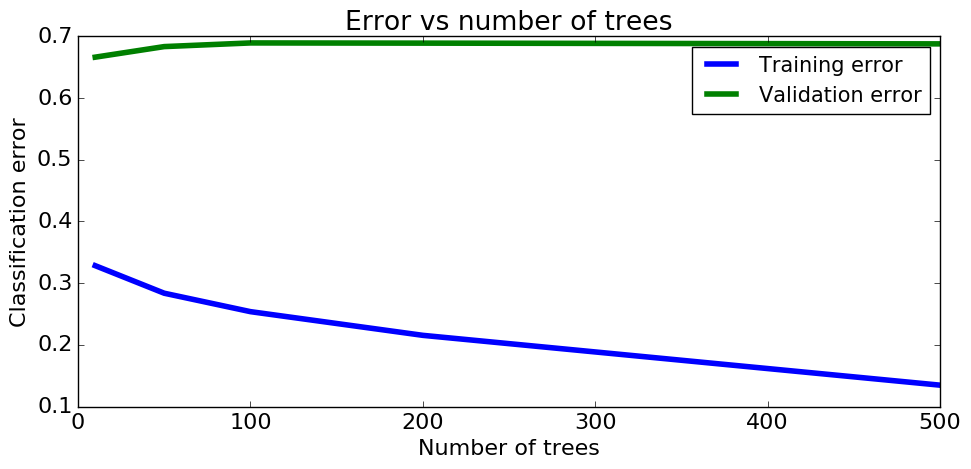

In [468]:
plt.plot([10, 50, 100, 200, 500], train_classification_error, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_classification_error, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')

** yes, training error reduces as # trees increase **
** No, not true that validation error will decrease as trees increase**